<a href="https://colab.research.google.com/github/OMG0718/Convertion-of-ONNX-to-HEF/blob/main/Copy_of_Raspberry_Pi_AI_Kit_Custom_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check** **Resource**

In [1]:
!nvidia-smi

Tue Jun 10 06:43:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOV8**

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 46.4/112.6 GB disk)


# **Exporting Dataset**

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gMUfs4AH3ZbWn8eO3hoJ")
project = rf.workspace("basketballtrain").project("basketball_net")
version = project.version(1)
dataset = version.download("yolov8")


# **Custom** **Training**

In [6]:
%cd /content/datasets/
%ls

!pip install torch==2.1.2 torchvision --upgrade

!pip uninstall numpy -y
!pip install numpy==1.26.4

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/basketball_net-1/data.yaml epochs=100 batch=16 imgsz=640 plots=True
#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 batch=16 imgsz=640 plots=True amp=True lr0=0.01 augment=True save_period=10 patience=5


/content/datasets
basketball_net-1/
  Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.20.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchvision-0.19.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torchvision-0.19.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torchvision-0.18.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requi

# **Confusion Matrix**

In [12]:
%cd {HOME}/datasets/runs/detect/train
!ls

/content/datasets/runs/detect/train
args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1749537887.ba47bf9a2c08.2899.0  train_batch2.jpg
F1_curve.png					    train_batch990.jpg
labels_correlogram.jpg				    train_batch991.jpg
labels.jpg					    train_batch992.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


/content/datasets/runs/detect/train


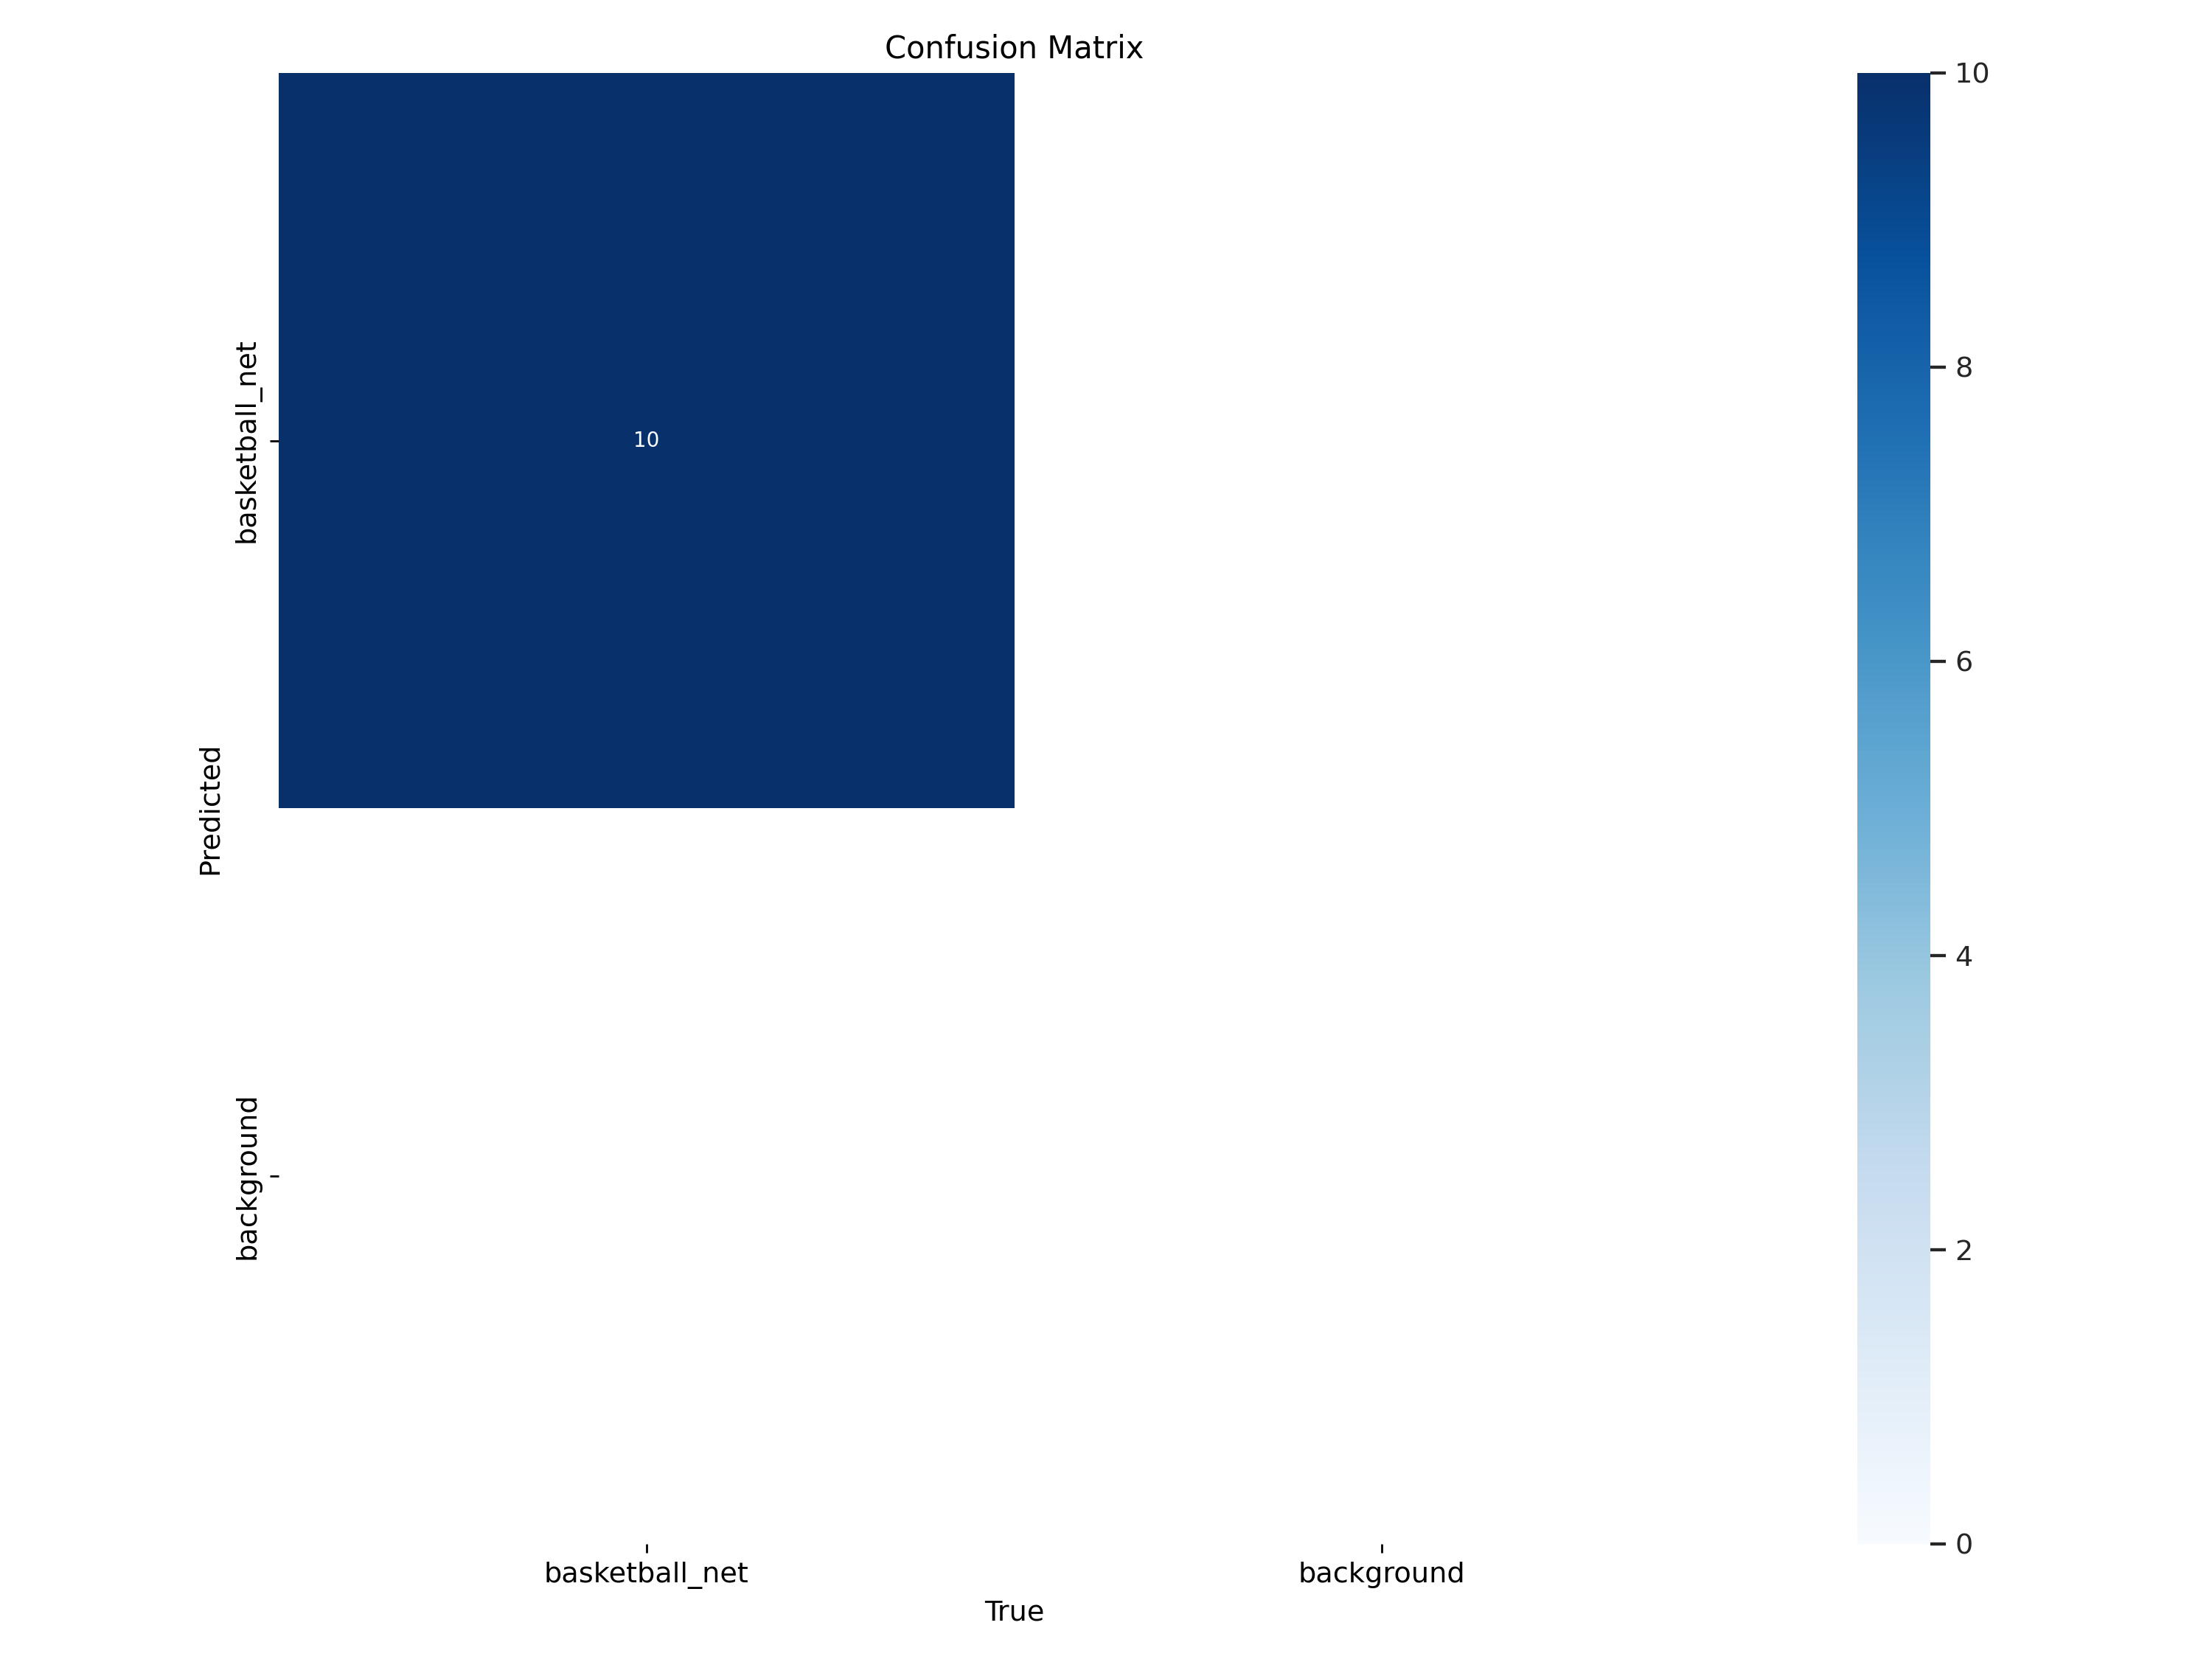

In [14]:
%cd {HOME}/datasets/runs/detect/train
Image(filename=f'confusion_matrix.png', width=600)

# **Model Validation**

In [20]:
#%cd {HOME}/datasets/basketball_net-1
#%ls

!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={HOME}/datasets/basketball_net-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/basketball_net-1/valid/labels.cache... 11 images, 1 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.58it/s]
                   all         11         10      0.995          1      0.995      0.995
Speed: 0.2ms preprocess, 14.2ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference**

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/datasets/basketball_net-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/4 /content/datasets/basketball_net-1/test/images/video_2025-06-08_21-59-54_mp4-0013_jpg.rf.8af1cf1bb42616a51bdcbd9ff5bc625f.jpg: 384x640 1 basketball_net, 116.3ms
image 2/4 /content/datasets/basketball_net-1/test/images/video_2025-06-08_21-59-54_mp4-0026_jpg.rf.048c1aff9904e69db2a07e508c94dc2a.jpg: 384x640 1 basketball_net, 10.8ms
image 3/4 /content/datasets/basketball_net-1/test/images/video_2025-06-08_21-59-54_mp4-0036_jpg.rf.2f6873e6bac46be3b836c33990e00aa9.jpg: 384x640 1 basketball_net, 11.8ms
image 4/4 /content/datasets/basketball_net-1/test/images/video_2025-06-08_21-59-54_mp4-0040_jpg.rf.1316411f39a0bbe70fa6728a1f9c2d74.jpg: 384x640 1 basketball_net, 11.7ms
Speed: 3.4ms preprocess, 37.7ms inference, 53.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Lea

# **Result**

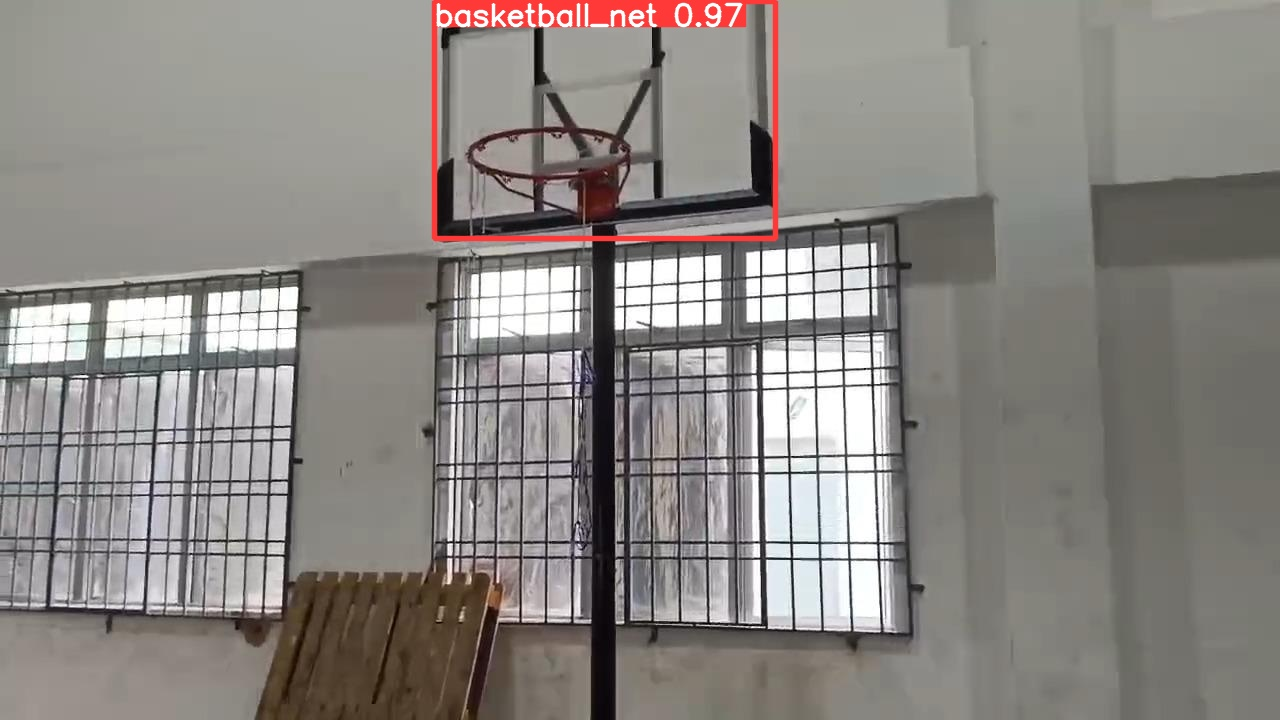

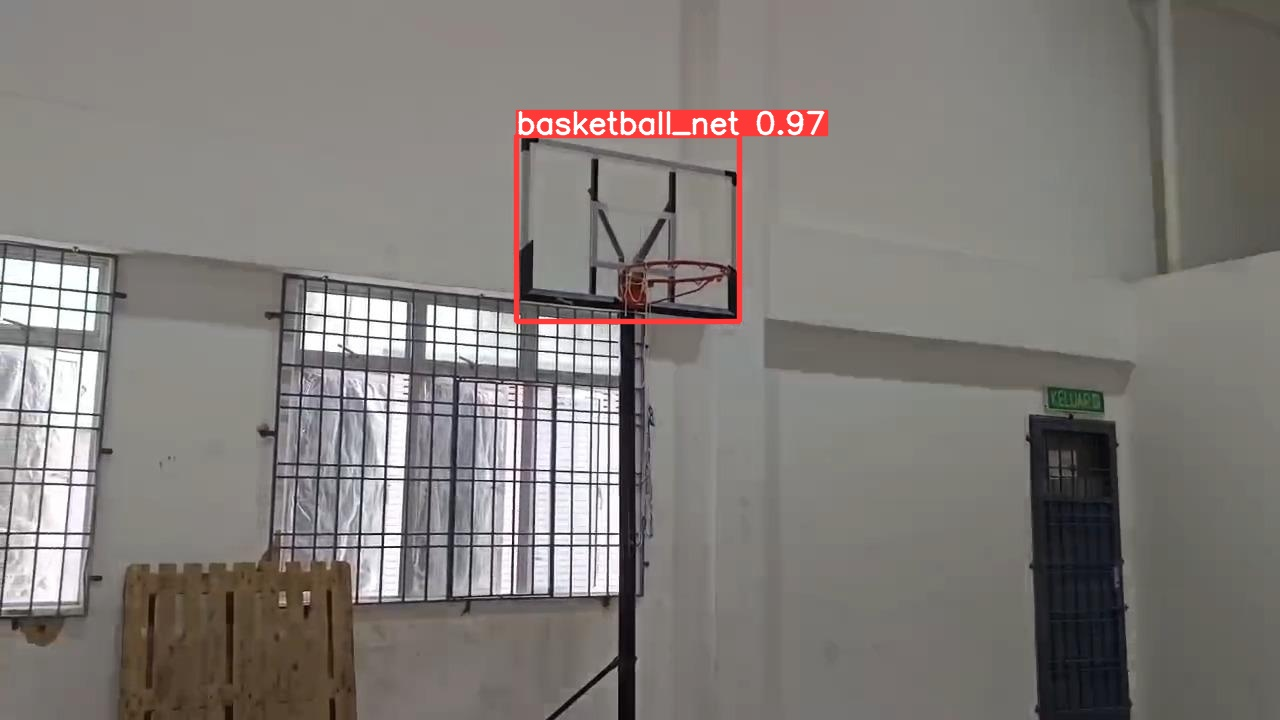

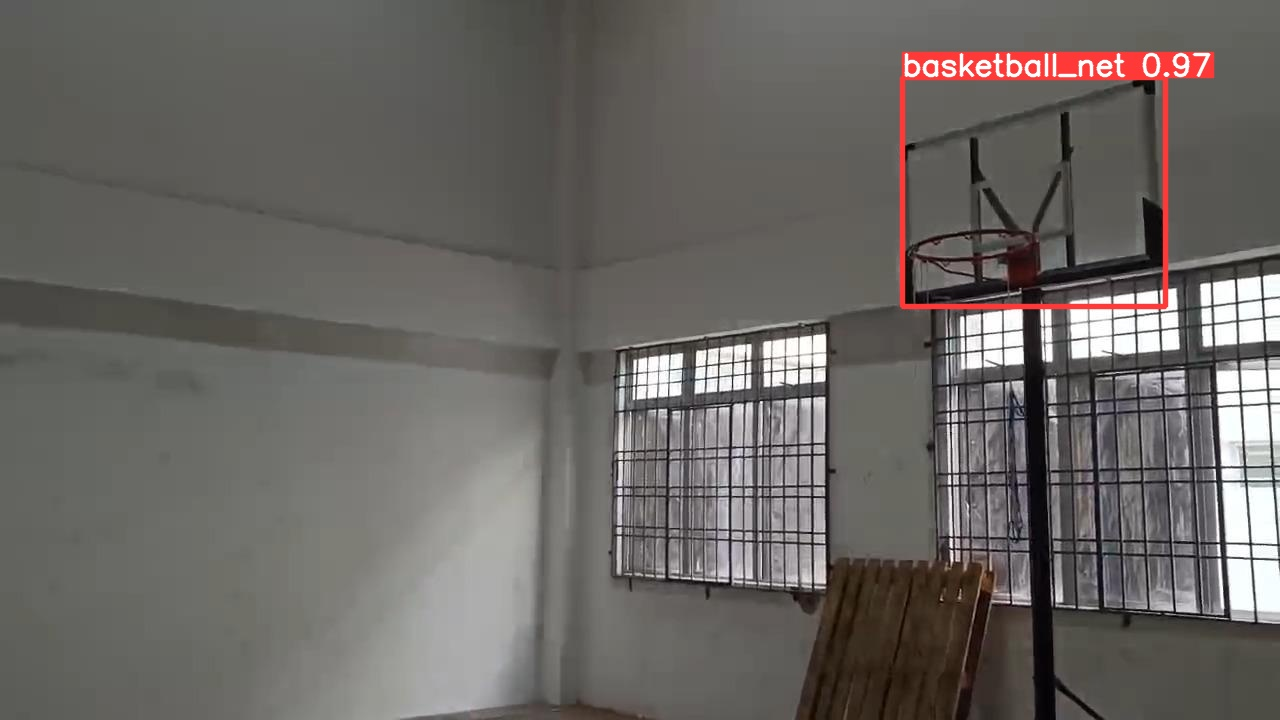

In [23]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# **Export** **ONNX**

In [28]:
%cd {HOME}/datasets/runs/detect/train/weights/

from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'




/content/datasets/runs/detect/train/weights


Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.1.2+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 298.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0 opset 17...
ONNX: export success ✅ 6.3s, saved as 'best.onnx' (42.6 MB)

Export complete (9.3s)
Results saved to /content/datasets/runs/detect/train/weights
Predict:         yolo predict task=detect model=best.onnx imgsz=640  
Validate:        yolo val task=detect model=best.onnx imgsz=640 data=/content/datasets/basketball_net-1/data.yaml  
Visual

'best.onnx'

# **Download** **ONNX**

In [30]:
%cd {HOME}/datasets/runs/detect/train/weights/

from google.colab import files

# Replace 'model.onnx' with the correct path to your exported model
files.download('best.onnx')
files.download('best.pt')

/content/datasets/runs/detect/train/weights


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>